In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import pi, sqrt

# Leap Frog Method

Let' say we want to solve the simple harmonic oscilattor equation

$$\frac{d^2y}{dx^2} = -\omega^2x$$

So the leap frog algorithm is like

$$ y_{n} = y_n + hv_{n+1/2} $$
$$ v_{n+3/2} = v_{n+1/2} - h\omega^2 y_{n} $$

In [116]:
omega = 1
y = 0
v = 1
x = 0
xf = 1e1
n = 1000
h = (xf-x)/n
ys = []
vs = []
xs = []

In [117]:
def f(x):
    return -omega**2*x

In [118]:
for i in range(n):
    v12 = v + h*f(y)
    y += h*v12
    v = v12 + h*f(y)
    
    x += h
    xs.append(x)
    ys.append(y)
    vs.append(v)

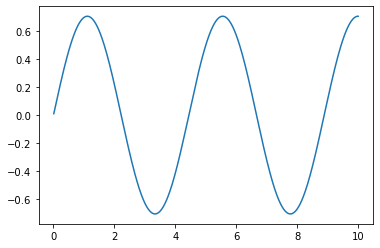

In [119]:
import matplotlib.pyplot as plt
plt.plot(xs,ys)

In [157]:
omega = 1
y = 0
v = 1
x = 0
xf = 1e2
n = 1000
h = (xf-x)/n
ys = []
vs = []
xs = []

for i in range(n):
    y += v*h
    v += f(y)*h
    x += h
    ys.append(y)
    xs.append(x)
    vs.append(v)
    
omega = 1
y = 0
v = 1
x = 0
xf = 1e2
n = 1000
h = (xf-x)/n

ys_l = []
vs_l = []
xs_l = []

for i in range(n):
    v += h*f(y)/2
    y += h*v
    v += h*f(y)/2
    
    x += h
    xs_l.append(x)
    ys_l.append(y)
    vs_l.append(v)

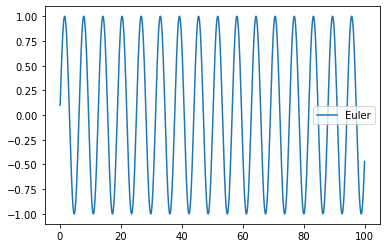

In [158]:
plt.plot(xs,ys, label = 'Euler')
# plt.plot(xs_l,ys_l,label="Leap Frog")
plt.legend();

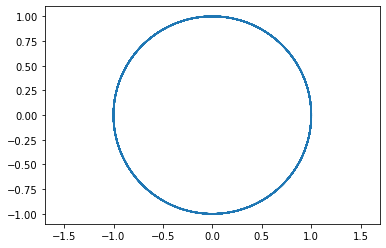

In [160]:
plt.plot(ys_l,vs_l)
plt.axis("equal");

# solving newton's lows using verlet algorithms

$$ s\'{o}cC $$

So the coupled differential equation for the system of planet orbiting around the star is:


$$\frac{d^2x}{dt^2} = -\frac{x}{(x^2+y^2)^{3/2}}$$
$$\frac{d^2y}{dt^2} = -\frac{y}{(x^2+y^2)^{3/2}}$$

In [81]:
#intial varivables
x = 2
y = 0
vx = 0
vy = 0.6
t = 0
tf = 50

n = 1000
h = (tf-t)/n

#lists to store varivabels
xs = [x]
ys = [y]
ts = [t]


def ax(x,y):
    return -x/pow(x**2 + y**2, 3/2)
        

def ay(x,y):
    return -y/pow(x**2 + y**2, 3/2)

# the verlet algorithms
for i in range(n):
    vx += h/2*ax(x,y)
    vy += h/2*ay(x,y)
    
    x += vx*h
    y += vy*h
    
    vx += h/2*ax(x,y)
    vy += h/2*ay(x,y)
    
    t += h
    
    xs.append(x)
    ys.append(y)
    ts.append(t)
    

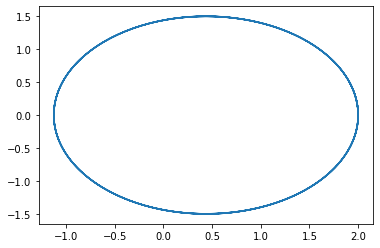

In [82]:
plt.plot(xs,ys)

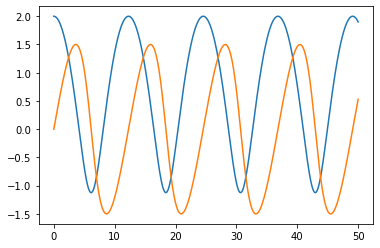

In [85]:
plt.plot(ts,xs)
plt.plot(ts,ys)